In [1]:
from lib_linear import *
from matplotlib.pyplot import figure

input_input_matrix = np.array(pd.read_csv('input_input_matrix.csv'))
output_input_matrix = np.array(pd.read_csv('output_input_matrix.csv'))
output_output_matrix = np.array(pd.read_csv('output_output_matrix.csv'))

V_matrix = np.array(pd.read_csv('V_matrix.csv'))
U_matrix = np.array(pd.read_csv('U_matrix.csv'))
S31_matrix = np.array(pd.read_csv('S_matrix.csv'))  ##actually, just diag values

S11_matrix = V_matrix.T @ input_input_matrix @ V_matrix
S33_matrix = output_output_matrix

In [2]:
def make_corrections(input_dim, output_dim, hidden_dim1, path):
    
    weight1 = np.array(pd.read_csv(path + 'w1.csv')['w1'])
    weight2 = np.array(pd.read_csv(path + 'w2.csv')['w2'])
    w1 = np.reshape(weight1, (hidden_dim1, input_dim ))               
    w2 = np.reshape(weight2, (output_dim, hidden_dim1))                    

    figure(figsize=(12, 4), dpi=300)
    R = U_matrix.T @ w2 @ w1 @ V_matrix
    plt.imshow( R[:100,:100], cmap = newcmp, vmin=-0.05, vmax=0.05)
    plt.colorbar()
    plt.show()
    
    S11_tab = [0]*10
    for alpha in range(10):
        S11_tab[alpha] = S31_matrix[alpha]/R[alpha][alpha] 
    
    print("\nOriginal S_11 matrix:\n", np.diag(S11_matrix)[:10])
    print("\nNew S_11* matrix:\n", S11_tab)
    
    term_1 = 0
    term_2 = 0
    term_4 = 0
    term_1_star = 0
    term_2_star = 0
    term_4_star = 0

    for alpha in range(10):
        term_1 += (R[alpha][alpha] - S31_matrix[alpha]/S11_matrix[alpha][alpha])**2 * S11_matrix[alpha][alpha]
        term_1_star += (R[alpha][alpha] - S31_matrix[alpha]/S11_tab[alpha])**2 * S11_tab[alpha]
    
    for beta in range(10):
        for alpha in range(784):
            if(alpha != beta):
                term_2 += (R[beta][alpha])**2 *S11_matrix[alpha][alpha]
                if alpha <10:
                    term_2_star += (R[beta][alpha])**2 * S11_tab[alpha]
                else:
                    term_2_star += (R[beta][alpha])**2 *S11_matrix[alpha][alpha]

    term_3 = np.trace(S33_matrix)
    term_3_star = np.trace(S33_matrix)

    for alpha in range(10):
        term_4+= (S31_matrix[alpha])**2/S11_matrix[alpha][alpha]
        term_4_star+= (S31_matrix[alpha])**2/S11_tab[alpha]
    
    term_1 = round(float(term_1), 4)
    term_2 = round(float(term_2), 4)
    term_4 = round(float(term_4), 4)
    term_1_star = round(float(term_1_star), 4)
    term_2_star = round(float(term_2_star), 4)
    term_4_star = round(float(term_4_star), 4)
    ground_energy = round(term_3-term_4, 4)
    ground_energy_star = round(term_3_star-term_4_star, 4)
    
    total = round(term_1+term_2+term_3-term_4, 4)
    total_star=round(term_1_star+term_2_star+term_3_star-term_4_star, 4)
    
    print(f"\nold: term 1={term_1}, term2 = {term_2}, term4 = {term_4}")
    print(f"ground energy: {ground_energy}, sum ={total} ")
    print(f"\nstar: term 1={term_1_star}, term2 = {term_2_star}, term4 = {term_4_star}")
    print(f"ground energy: {ground_energy_star}, sum ={total_star}")


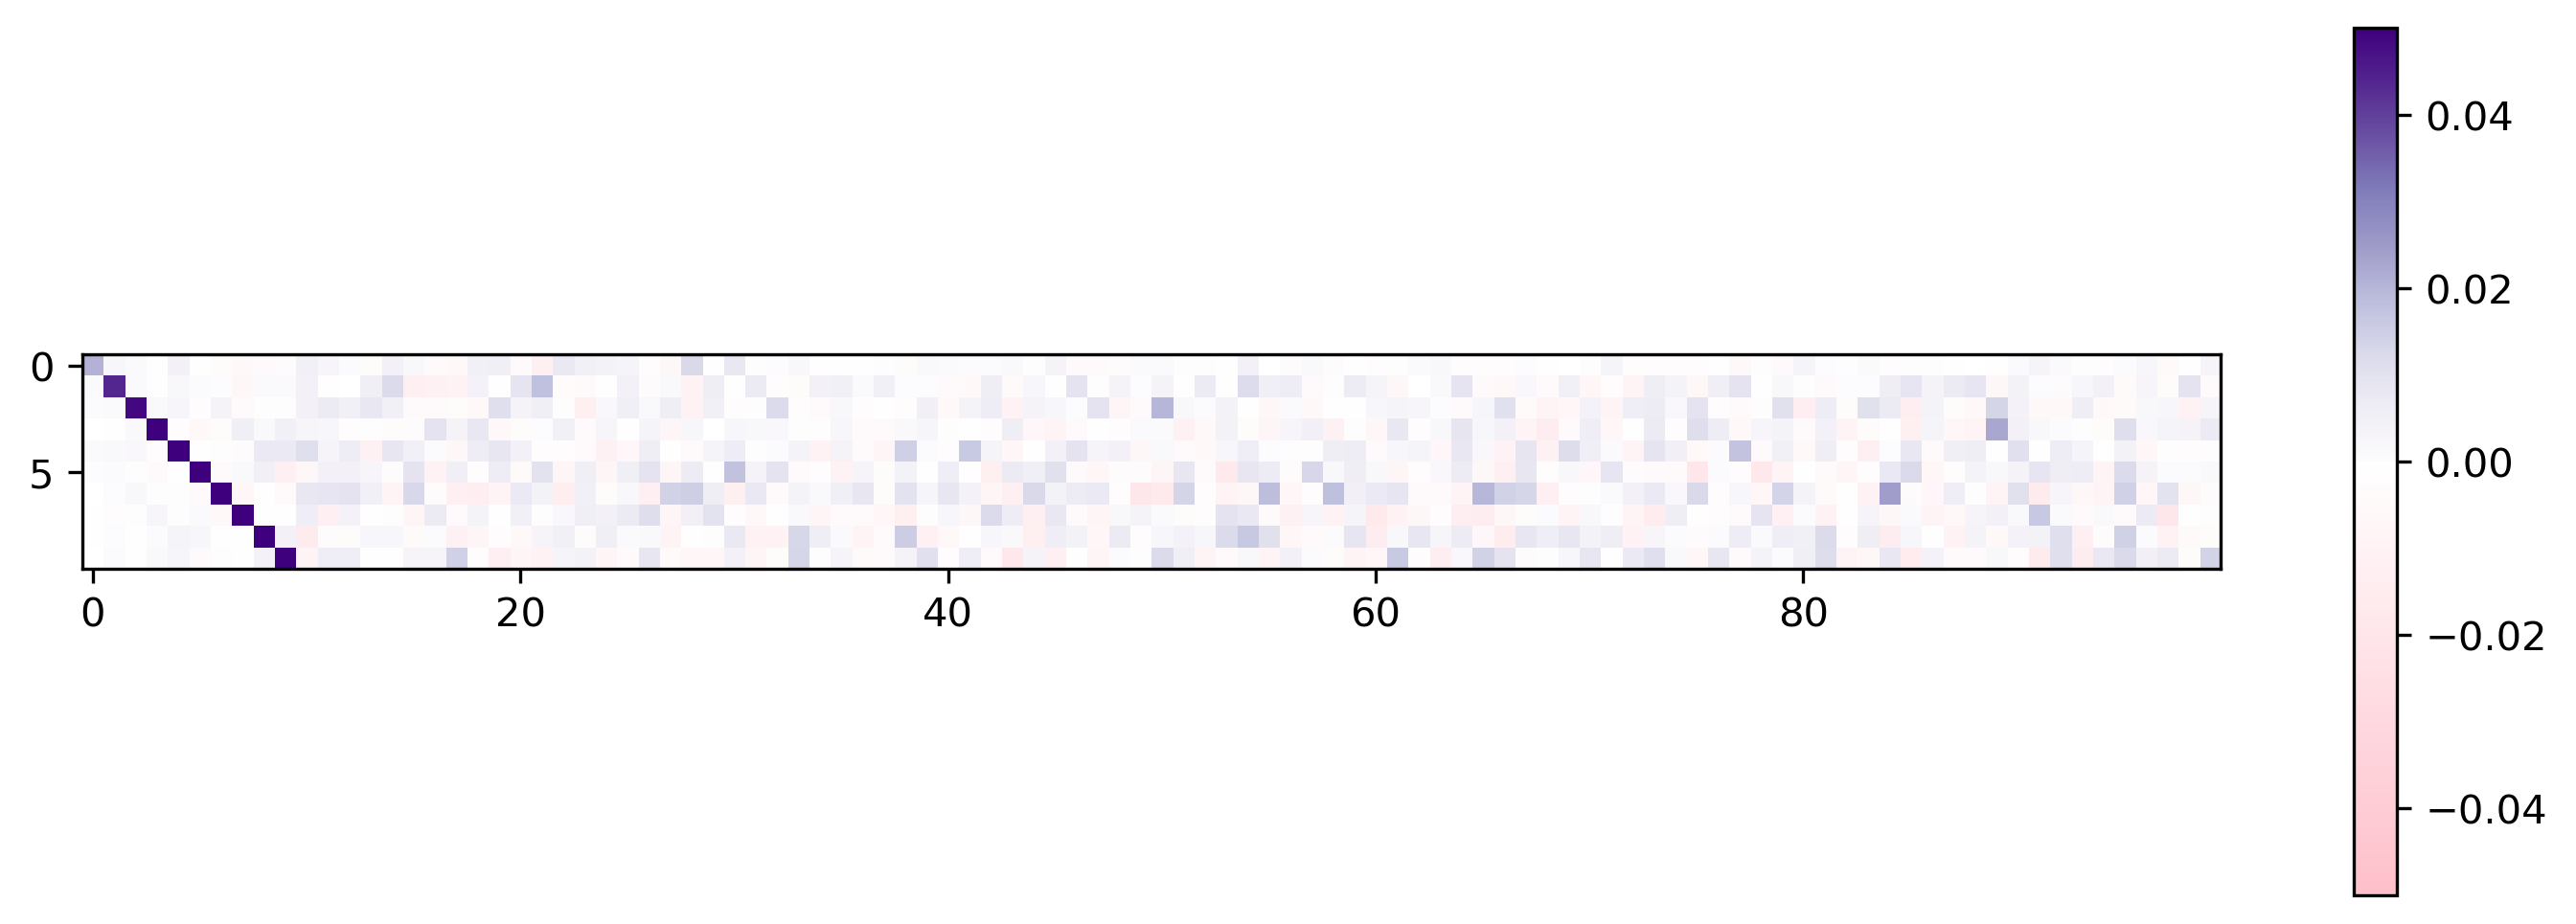


Original S_11 matrix:
 [248.42322238  48.73808175  38.62772085  29.65086417  22.88617233
  19.19500959  18.18674617  12.20370532   8.76540557   8.38876046]

New S_11* matrix:
 [array([232.96727722]), array([41.74719977]), array([33.89394246]), array([26.79291823]), array([17.84914012]), array([14.53323114]), array([11.62636544]), array([8.91727118]), array([5.36271876]), array([4.93438314])]

old: term 1=0.0456, term2 = 0.1648, term4 = 0.4972
ground energy: 0.5028, sum =0.7132 

star: term 1=0.0, term2 = 0.1616, term4 = 0.6173
ground energy: 0.3827, sum =0.5443


In [3]:
input_dim = 784
output_dim = 10
hidden_dim1 = 100
path = str(hidden_dim1) + '/'
make_corrections(input_dim, output_dim, hidden_dim1, path)

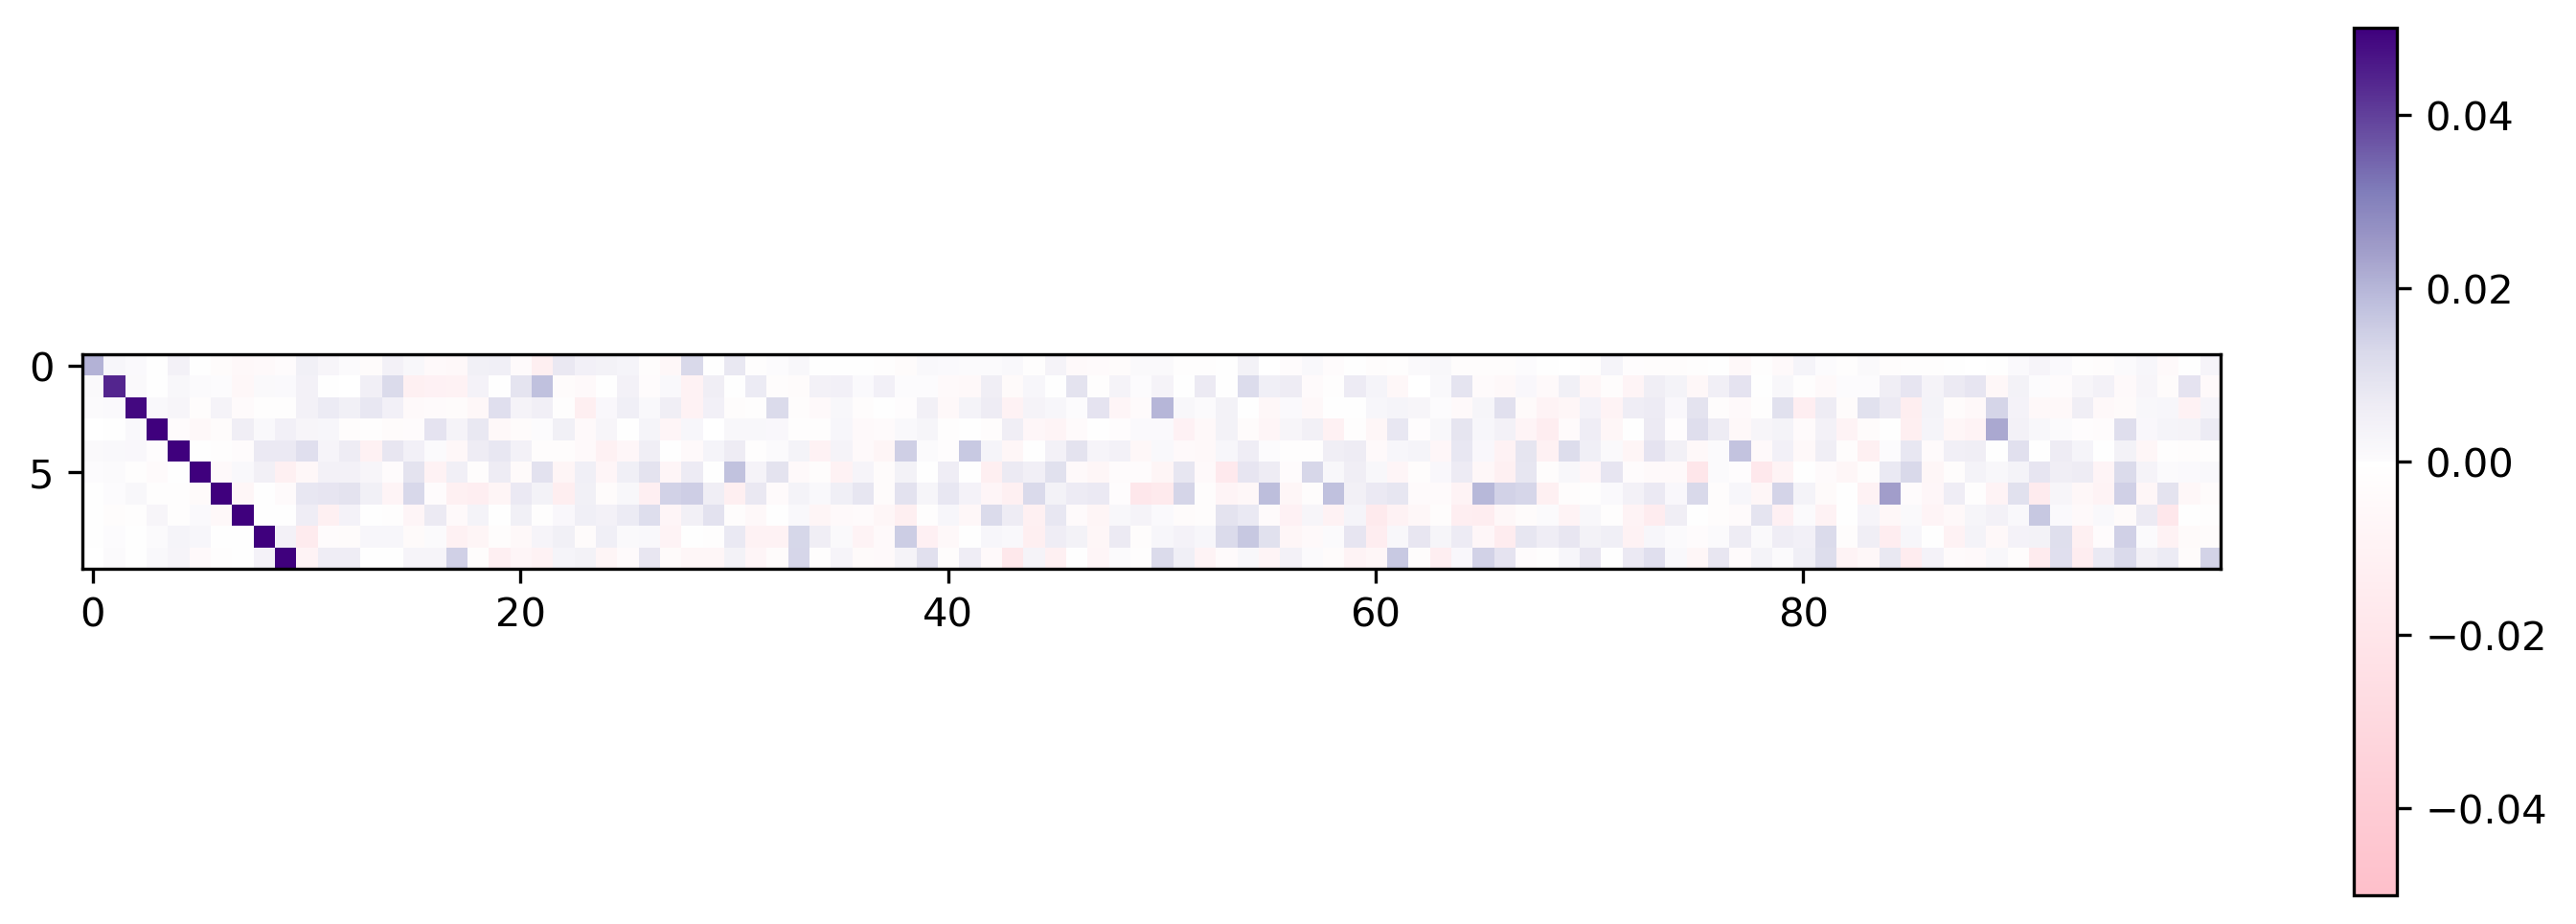


Original S_11 matrix:
 [248.42322238  48.73808175  38.62772085  29.65086417  22.88617233
  19.19500959  18.18674617  12.20370532   8.76540557   8.38876046]

New S_11* matrix:
 [array([232.93480504]), array([41.72456413]), array([33.85351484]), array([26.78957317]), array([17.83828046]), array([14.54012848]), array([11.64667182]), array([8.91727844]), array([5.3556135]), array([4.92980623])]

old: term 1=0.0456, term2 = 0.1649, term4 = 0.4972
ground energy: 0.5028, sum =0.7133 

star: term 1=0.0, term2 = 0.1617, term4 = 0.6175
ground energy: 0.3825, sum =0.5442


In [4]:
input_dim = 784
output_dim = 10
hidden_dim1 = 200
path = str(hidden_dim1) + '/'
make_corrections(input_dim, output_dim, hidden_dim1, path)

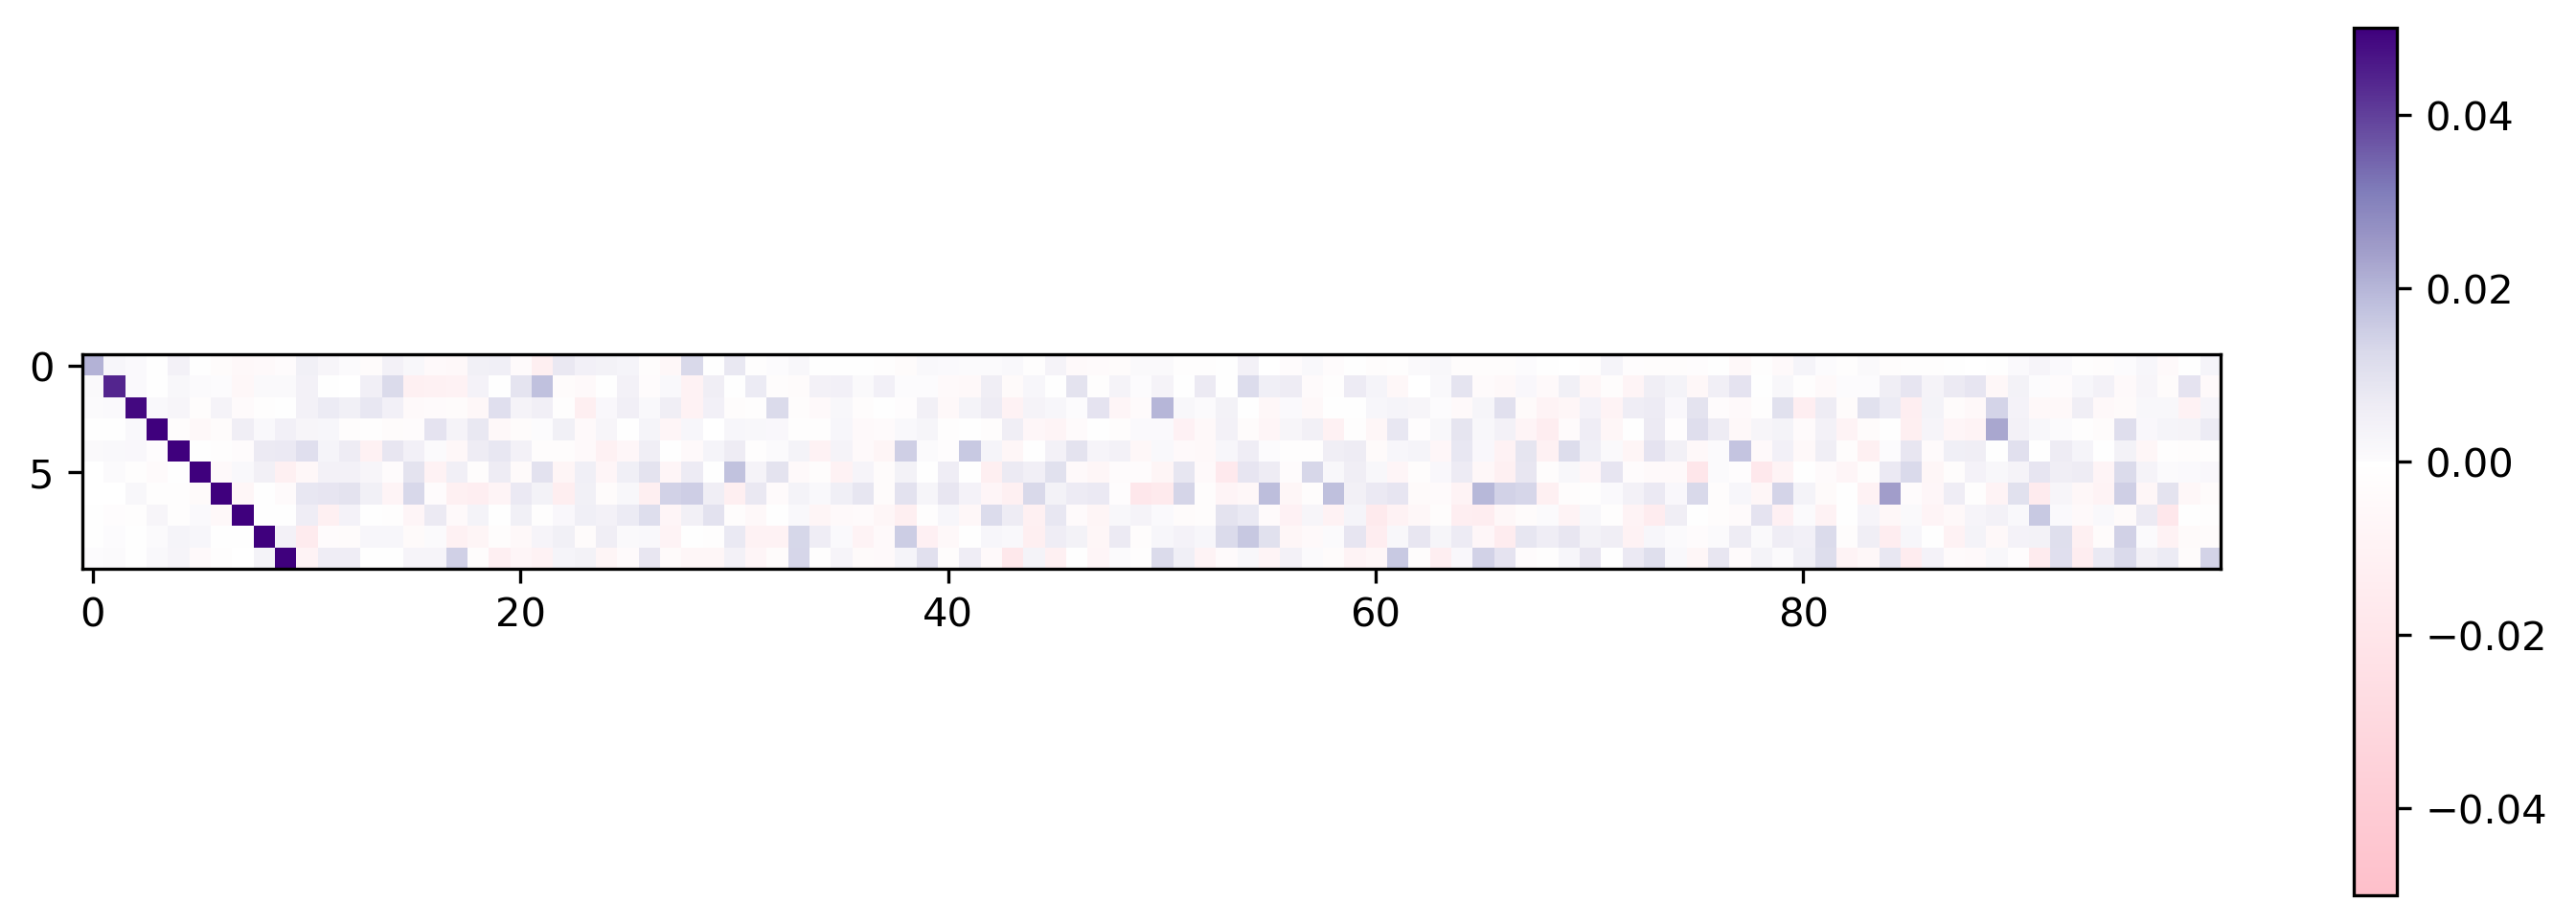


Original S_11 matrix:
 [248.42322238  48.73808175  38.62772085  29.65086417  22.88617233
  19.19500959  18.18674617  12.20370532   8.76540557   8.38876046]

New S_11* matrix:
 [array([232.96909224]), array([41.69727793]), array([33.86715948]), array([26.78705465]), array([17.82930507]), array([14.52561421]), array([11.63138174]), array([8.91462078]), array([5.35385614]), array([4.92129056])]

old: term 1=0.0459, term2 = 0.1652, term4 = 0.4972
ground energy: 0.5028, sum =0.7139 

star: term 1=0.0, term2 = 0.162, term4 = 0.6177
ground energy: 0.3823, sum =0.5443


In [5]:
input_dim = 784
output_dim = 10
hidden_dim1 = 300
path = str(hidden_dim1) + '/'
make_corrections(input_dim, output_dim, hidden_dim1, path)

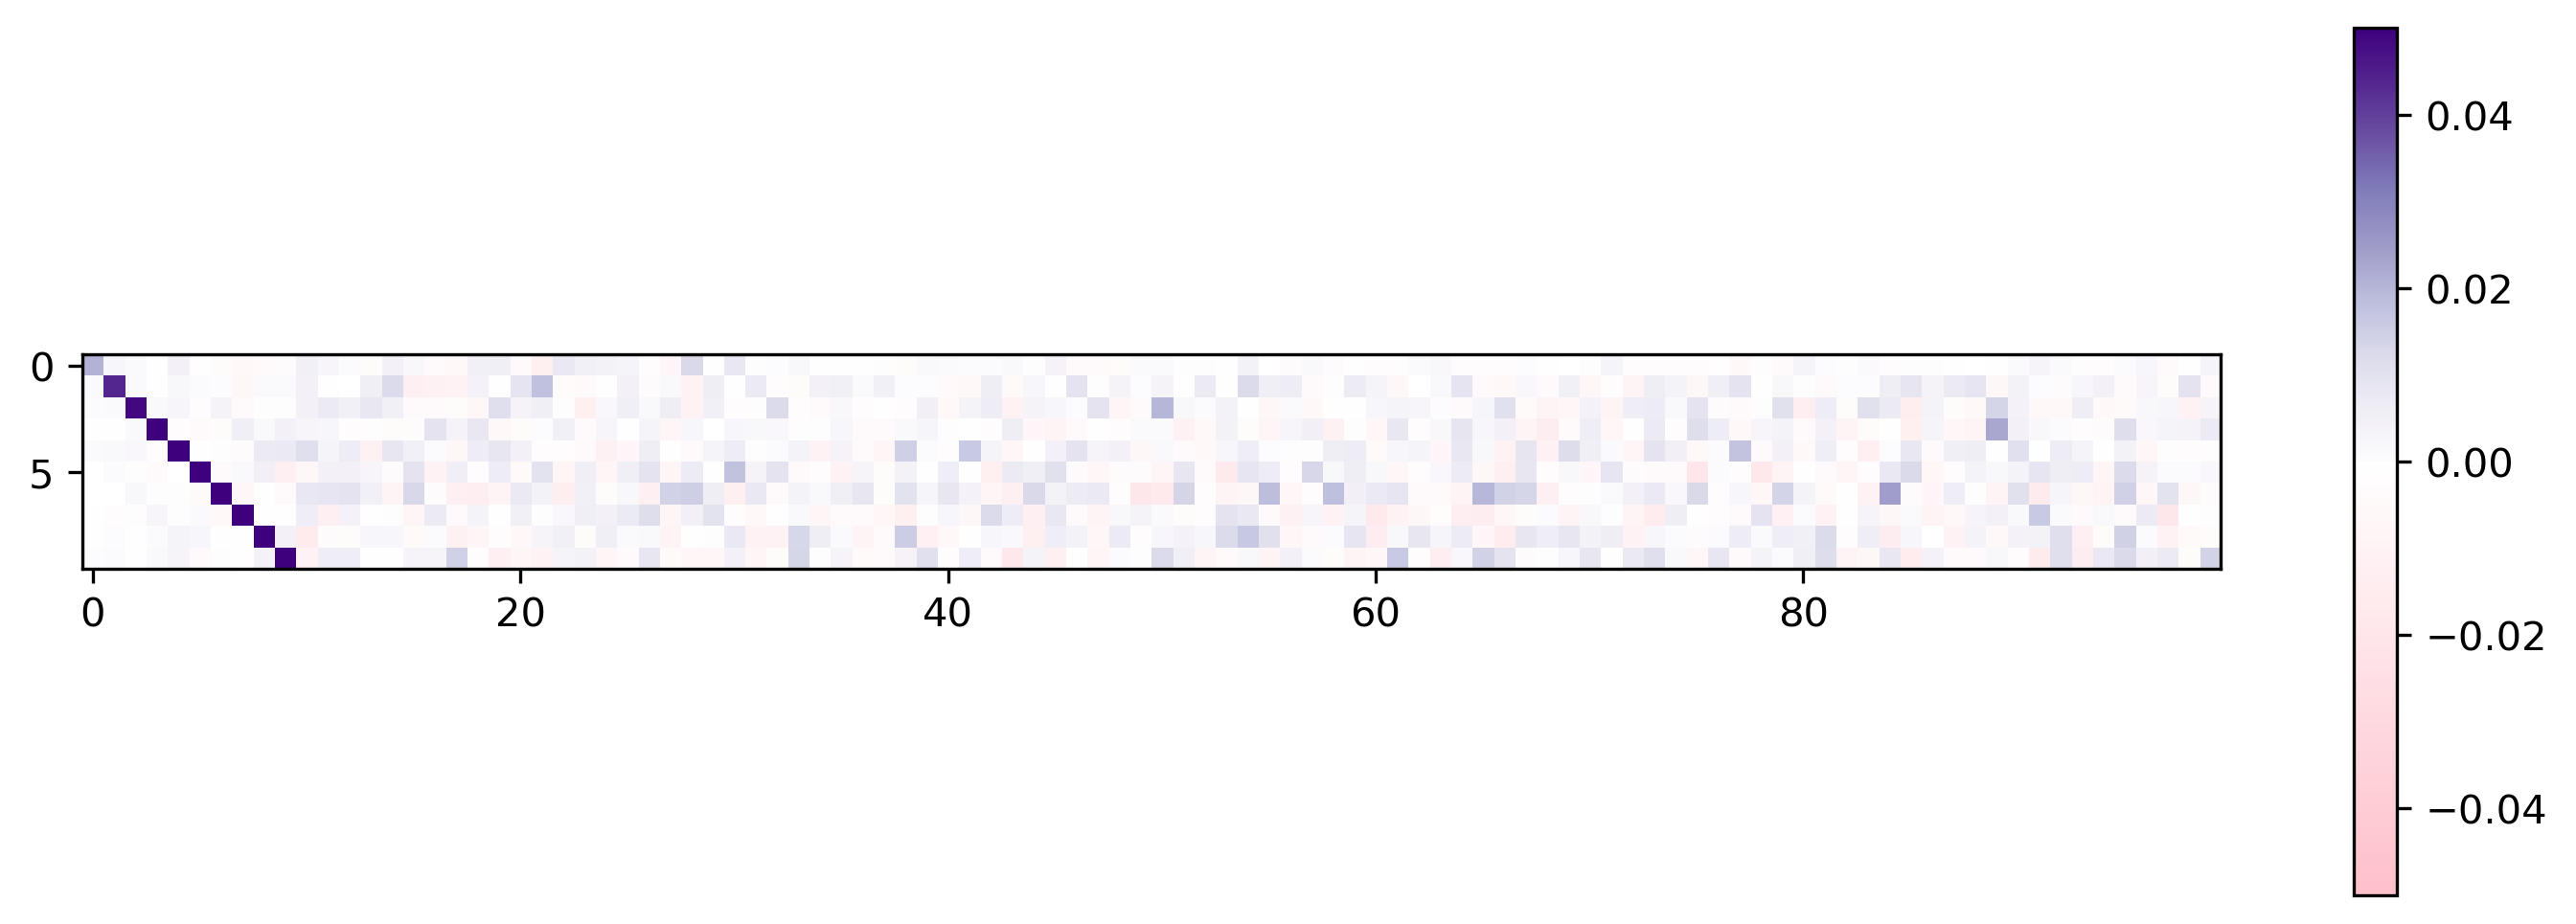


Original S_11 matrix:
 [248.42322238  48.73808175  38.62772085  29.65086417  22.88617233
  19.19500959  18.18674617  12.20370532   8.76540557   8.38876046]

New S_11* matrix:
 [array([232.94492152]), array([41.70219305]), array([33.83830456]), array([26.76613792]), array([17.8131089]), array([14.51928805]), array([11.63172486]), array([8.90607989]), array([5.35224155]), array([4.91680352])]

old: term 1=0.046, term2 = 0.1655, term4 = 0.4972
ground energy: 0.5028, sum =0.7143 

star: term 1=0.0, term2 = 0.1623, term4 = 0.618
ground energy: 0.382, sum =0.5443


In [6]:
input_dim = 784
output_dim = 10
hidden_dim1 = 400
path = str(hidden_dim1) + '/'
make_corrections(input_dim, output_dim, hidden_dim1, path)

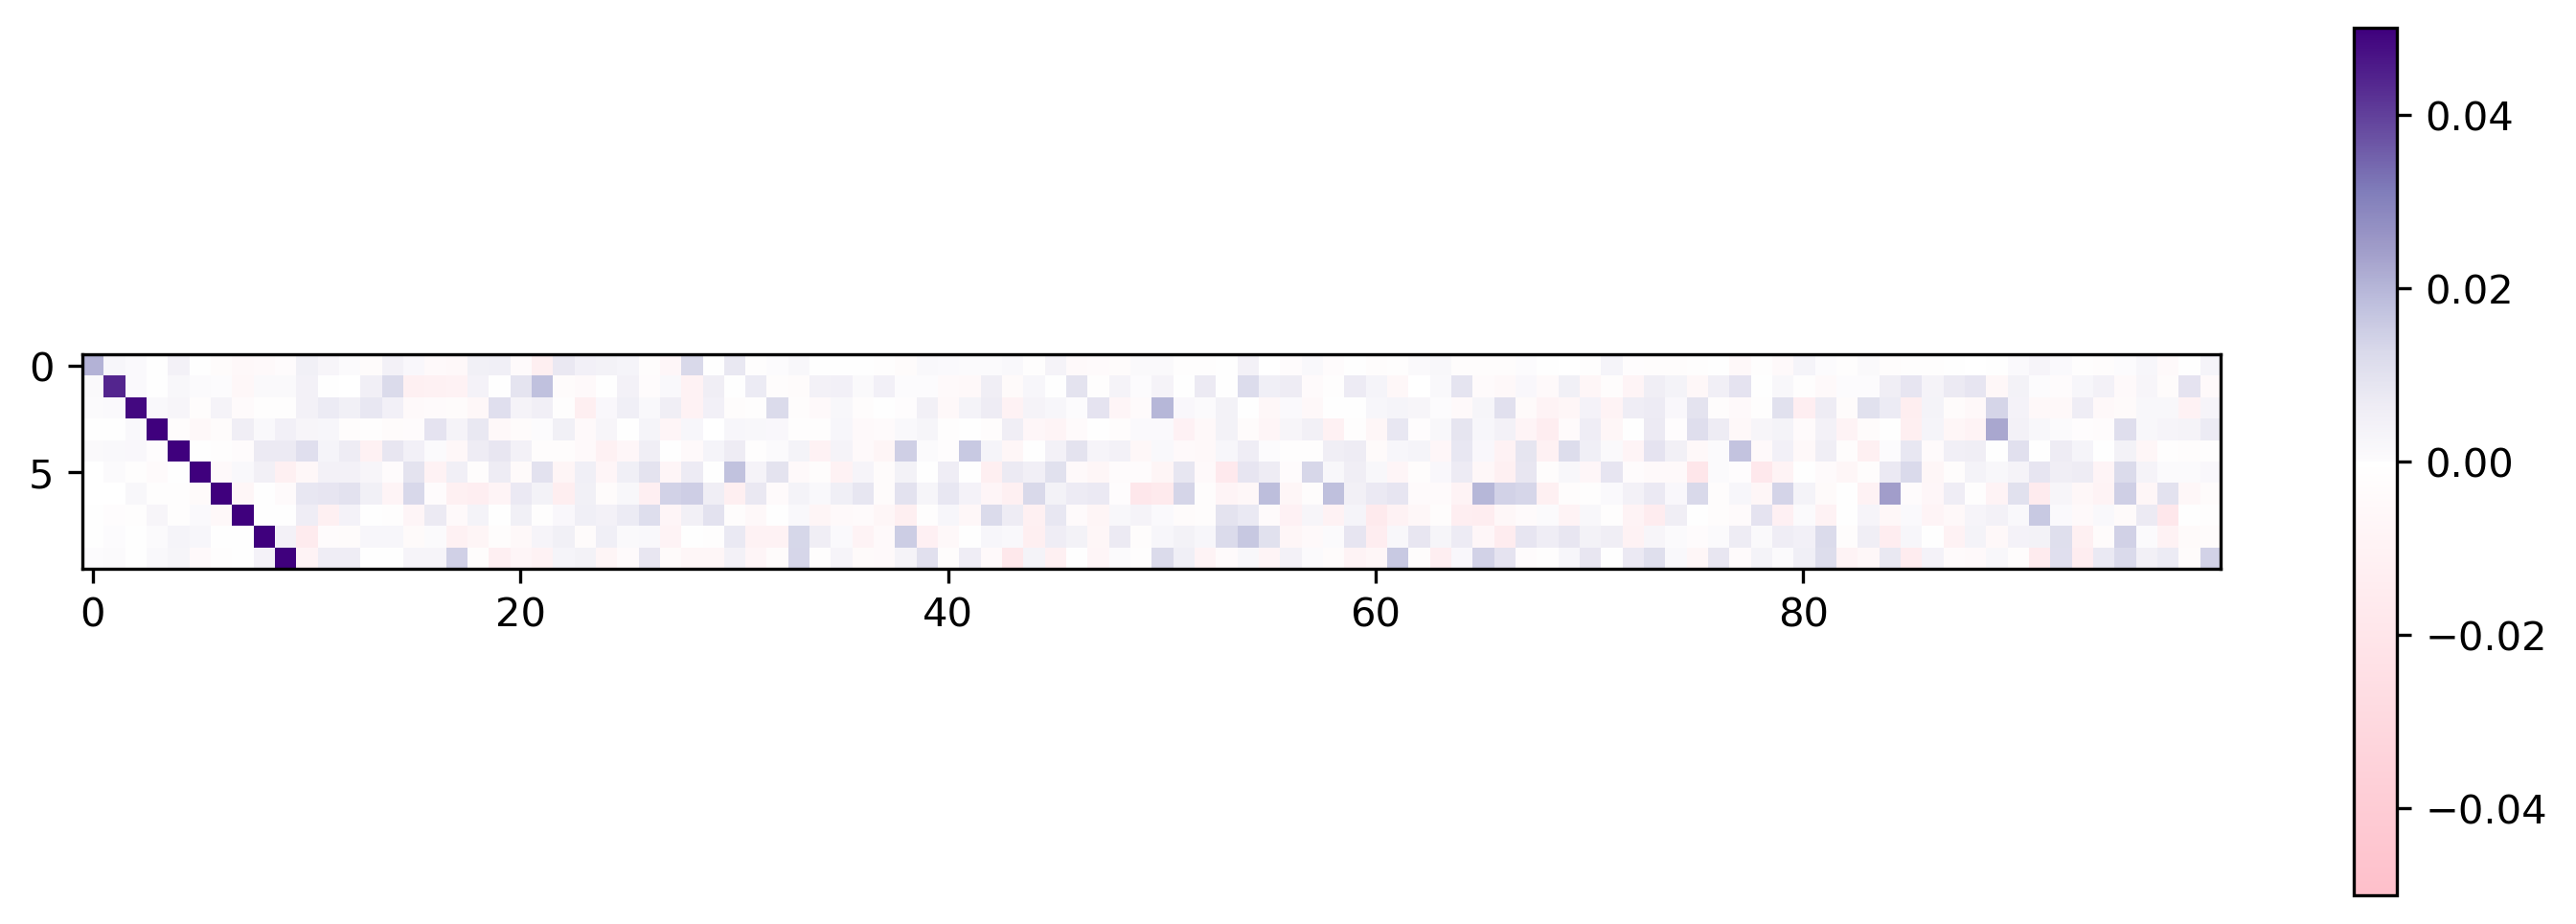


Original S_11 matrix:
 [248.42322238  48.73808175  38.62772085  29.65086417  22.88617233
  19.19500959  18.18674617  12.20370532   8.76540557   8.38876046]

New S_11* matrix:
 [array([233.07026459]), array([41.68050441]), array([33.84730919]), array([26.77647464]), array([17.81397662]), array([14.51193656]), array([11.61449041]), array([8.90672021]), array([5.3473709]), array([4.91444389])]

old: term 1=0.0462, term2 = 0.1657, term4 = 0.4972
ground energy: 0.5028, sum =0.7147 

star: term 1=0.0, term2 = 0.1625, term4 = 0.6181
ground energy: 0.3819, sum =0.5444


In [7]:
input_dim = 784
output_dim = 10
hidden_dim1 = 500
path = str(hidden_dim1) + '/'
make_corrections(input_dim, output_dim, hidden_dim1, path)

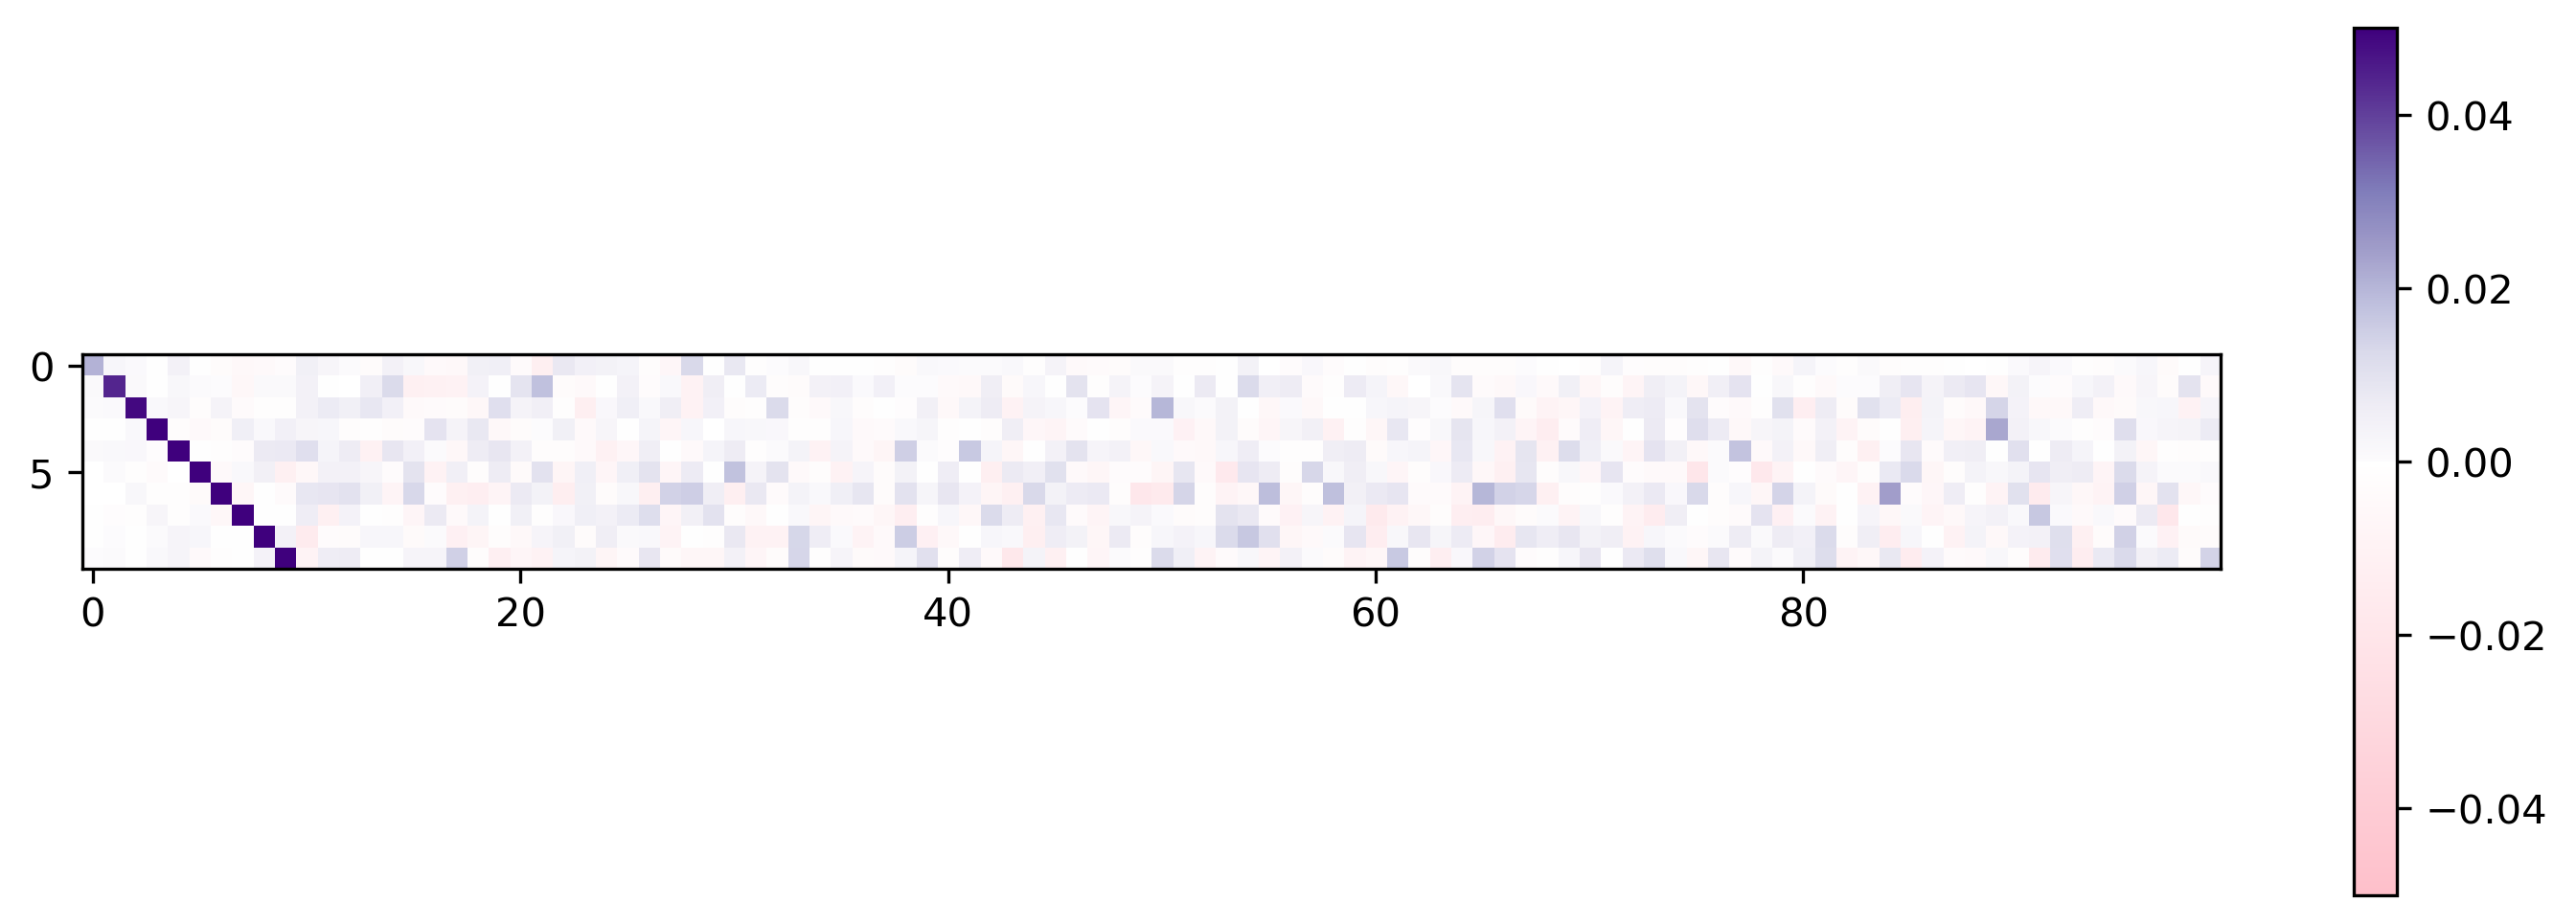


Original S_11 matrix:
 [248.42322238  48.73808175  38.62772085  29.65086417  22.88617233
  19.19500959  18.18674617  12.20370532   8.76540557   8.38876046]

New S_11* matrix:
 [array([232.91598223]), array([41.65887369]), array([33.8430043]), array([26.76911393]), array([17.81310265]), array([14.50405617]), array([11.61558446]), array([8.89788242]), array([5.34153051]), array([4.91193609])]

old: term 1=0.0464, term2 = 0.166, term4 = 0.4972
ground energy: 0.5028, sum =0.7152 

star: term 1=0.0, term2 = 0.1628, term4 = 0.6184
ground energy: 0.3816, sum =0.5444


In [8]:
input_dim = 784
output_dim = 10
hidden_dim1 = 600
path = str(hidden_dim1) + '/'
make_corrections(input_dim, output_dim, hidden_dim1, path)

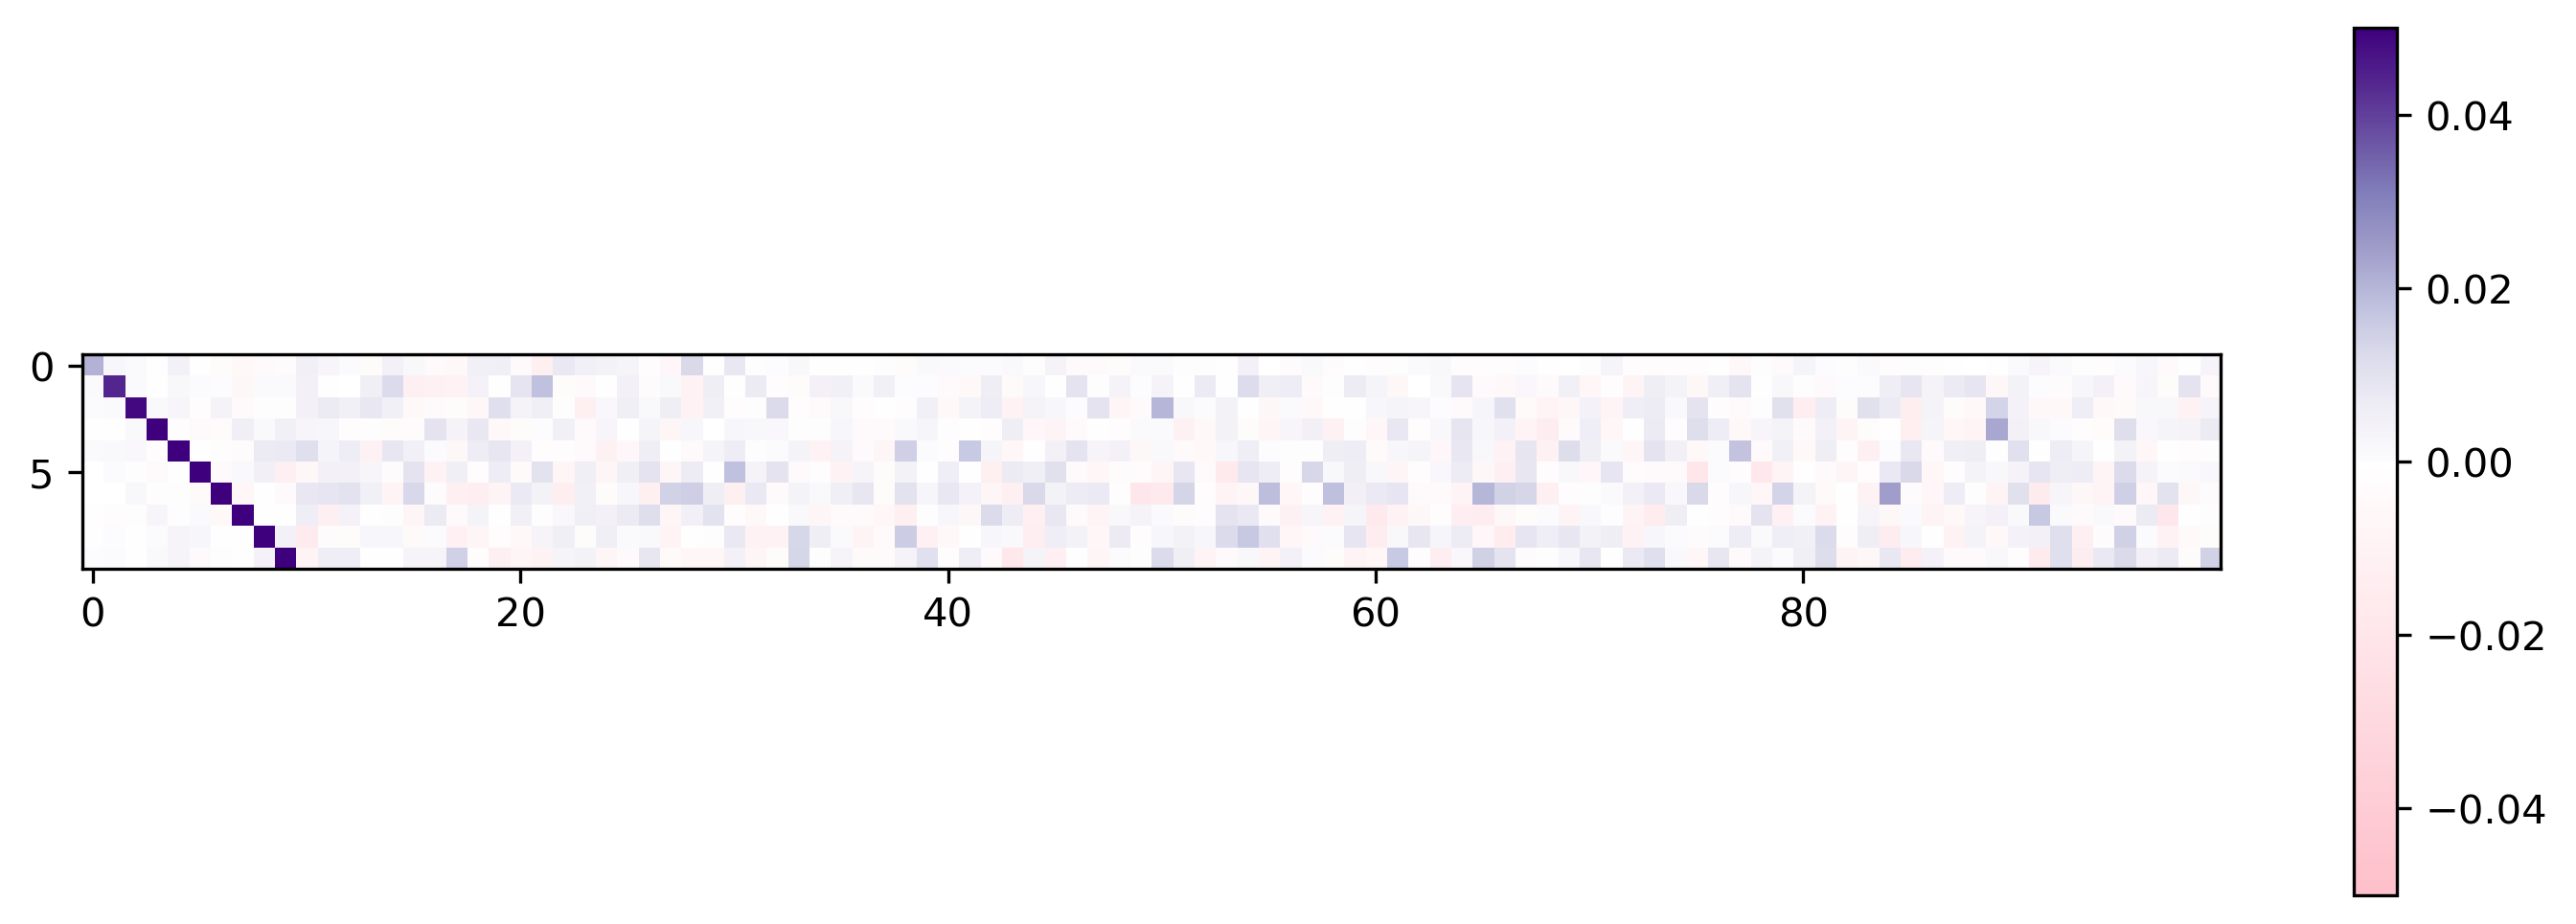


Original S_11 matrix:
 [248.42322238  48.73808175  38.62772085  29.65086417  22.88617233
  19.19500959  18.18674617  12.20370532   8.76540557   8.38876046]

New S_11* matrix:
 [array([232.97256084]), array([41.65832139]), array([33.83289842]), array([26.76377047]), array([17.80669381]), array([14.50251916]), array([11.60819936]), array([8.89750563]), array([5.34241668]), array([4.91035318])]

old: term 1=0.0464, term2 = 0.1661, term4 = 0.4972
ground energy: 0.5028, sum =0.7153 

star: term 1=0.0, term2 = 0.1629, term4 = 0.6185
ground energy: 0.3815, sum =0.5444


In [9]:
input_dim = 784
output_dim = 10
hidden_dim1 = 700
path = str(hidden_dim1) + '/'
make_corrections(input_dim, output_dim, hidden_dim1, path)